point [0.13994707 0.46358203]
<class 'numpy.ndarray'>
[[2.73839599e-10 2.73839599e-10 2.73839599e-10 ... 5.49127683e-03
  5.49127683e-03 5.49127683e-03]
 [2.73839599e-10 2.73839599e-10 2.73839599e-10 ... 5.49127683e-03
  5.49127683e-03 5.49127683e-03]
 [2.73839599e-10 2.73839599e-10 2.73839599e-10 ... 5.49127683e-03
  5.49127683e-03 5.49127683e-03]
 ...
 [1.75908732e-08 1.75908732e-08 4.75669206e-07 ... 7.04275622e-04
  7.04275622e-04 7.04275622e-04]
 [1.75908732e-08 1.75908732e-08 1.75908732e-08 ... 7.04275622e-04
  7.04275622e-04 7.04275622e-04]
 [1.75908732e-08 1.75908732e-08 1.75908732e-08 ... 7.04275622e-04
  7.04275622e-04 7.04275622e-04]]


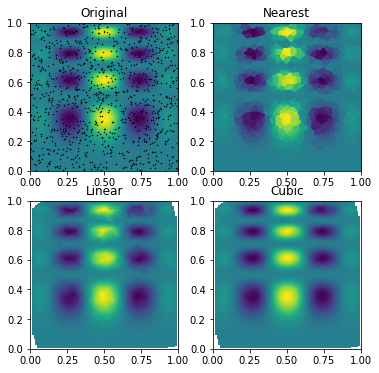

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import griddata

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
rng = np.random.default_rng()
points = rng.random((1000, 2))
print('point',points[0])
values = func(points[:,0], points[:,1])
print(type(values))

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

print(grid_z0)

plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)

plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')

plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')

plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')

plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()